# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [3]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [6]:
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

In [4]:
df['customerID'].isnull().sum()

0

In [5]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df['customerID'] = df['customerID'].astype(int)

ValueError: invalid literal for int() with base 10: '7590-VHVEG'

Nesta etapa, não vi necessidade de alterar os tipos de dados; optei por mantê-los como estão.

# 2 - Esse exercício faremos por etapas:


<h2>A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.</h2>

In [7]:
#seu código aqui
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

A coluna 'Gênero' possui 0,48% de dados faltantes, 'PhoneService' possui 59,28%, 'Pagamento_Mensal' possui 13% e 'Churn', 0,20%.

<h2>B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.</h2>

In [8]:
df.dropna(subset=['Genero'], inplace=True)

In [9]:
df['Genero'].isnull().sum()

0

In [10]:
df['Churn'].isnull().sum()

0

Optei por excluir as linhas com valores faltantes na coluna Gênero, pois representavam apenas 0,48% do total. Ressaltando que a coluna Churn possuía 0,20% de dados nulos, mas, por coincidência, esses registros estavam entre as mesmas linhas excluídas por ausência de valor em Gênero. Portanto, os valores nulos na coluna Churn já foram eliminados e não precisarão ser tratados neste momento.

<h2>C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.</h2>

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [9]:
#seu código aqui
(df.isnull().sum() / len(df)) * 100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

In [12]:
# verificação da coluna 'PhoneService'

df['PhoneService'].info()

<class 'pandas.core.series.Series'>
Index: 2488 entries, 0 to 2499
Series name: PhoneService
Non-Null Count  Dtype 
--------------  ----- 
1006 non-null   object
dtypes: object(1)
memory usage: 38.9+ KB


In [13]:
df['PhoneService'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['PhoneService'].unique()

array(['No', 'Yes', 'Desconhecido'], dtype=object)

<Axes: xlabel='PhoneService', ylabel='Count'>

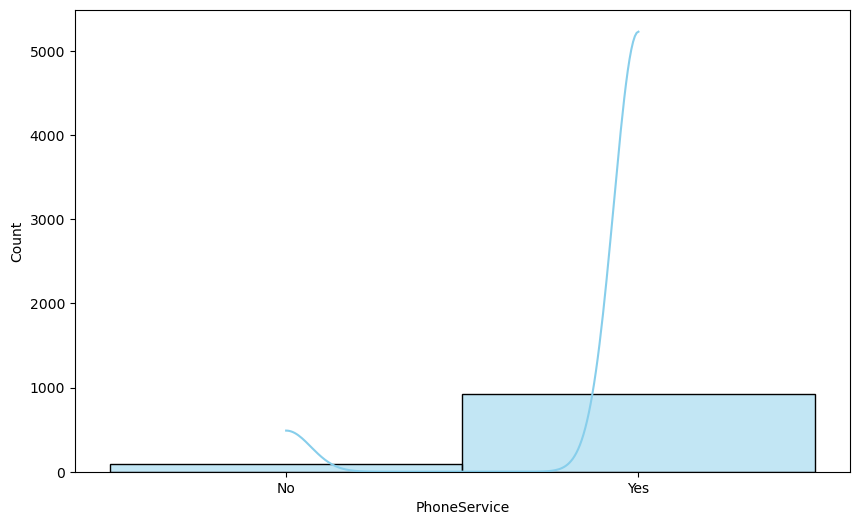

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PhoneService', bins=20, kde=True, color='skyblue')

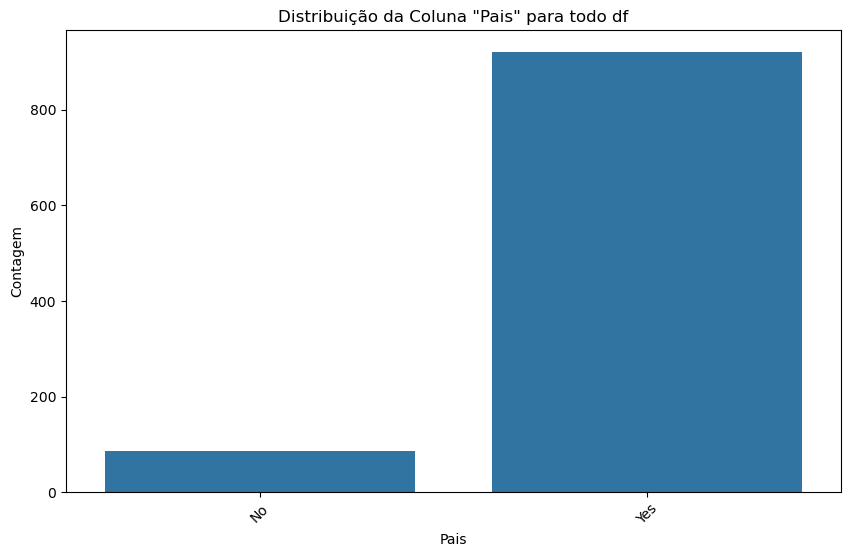

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PhoneService')
plt.title('Distribuição da Coluna "Pais" para todo df')
plt.xlabel('Pais')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Tratamento da coluna 'PhoneService', o valores nulos foram Substituídos por 'Desconhecido'
df['PhoneService'] = df['PhoneService'].fillna('Desconhecido')

In [14]:
# verificação da coluna 'Pagamento_Mensal'

df['Pagamento_Mensal'].info()

<class 'pandas.core.series.Series'>
Index: 2488 entries, 0 to 2499
Series name: Pagamento_Mensal
Non-Null Count  Dtype  
--------------  -----  
2175 non-null   float64
dtypes: float64(1)
memory usage: 38.9 KB


In [18]:
df['Pagamento_Mensal'].describe()

count    2175.000000
mean       65.607563
std        29.931520
min        18.400000
25%        39.500000
50%        71.450000
75%        90.250000
max       118.650000
Name: Pagamento_Mensal, dtype: float64

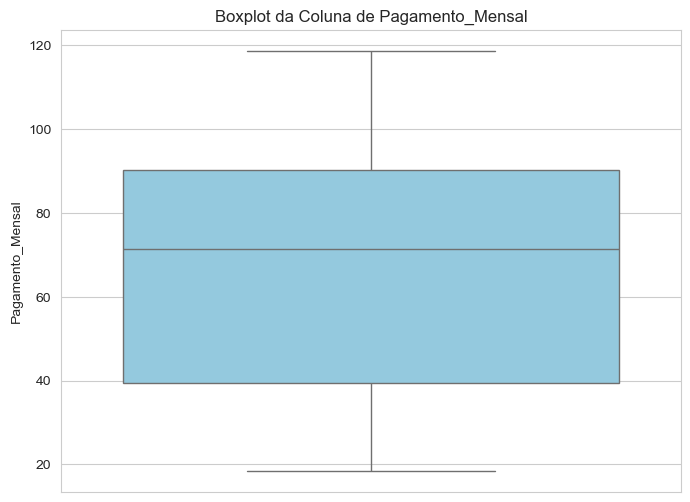

In [13]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento_Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

In [15]:
# Tratamento da coluna 'Pagamento_Mensal', os valores faltantes receberam o valor da mediana.
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].median())

In [16]:
df['Pagamento_Mensal'].isnull().sum()

0

Na coluna 'PhoneService', os dados faltantes foram substituídos por 'Desconhecido' neste momento. Já os dados ausentes da coluna 'Pagamento_Mensal' foram preenchidos com o valor da mediana. Antes disso, verifiquei se havia algum outlier, e como nenhum foi identificado, realizei a substituição diretamente. Optei pela mediana por considerá-la a opção mais adequada neste contexto.

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [70]:
#seu código aqui
df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,F,0,YES,NO,1,NO,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.85,29.85,NO
1,5575-GNVDE,M,0,NO,NO,34,YES,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.95,1889.50,NO
2,3668-QPYBK,M,0,NO,NO,2,YES,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.85,108.15,YES
3,7795-CFOCW,M,0,NO,NO,45,NO,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,1840.75,NO
16,8191-XWSZG,F,0,NO,NO,52,YES,NO,NO,NO,NO,ONE YEAR,MAILED CHECK,71.45,1022.95,NO


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2488 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2488 non-null   int64  
 3   Casado              2488 non-null   object 
 4   Dependents          2488 non-null   object 
 5   Tempo_como_Cliente  2488 non-null   int64  
 6   PhoneService        2488 non-null   object 
 7   Servico_Internet    2488 non-null   object 
 8   Servico_Seguranca   2488 non-null   object 
 9   Suporte_Tecnico     2488 non-null   object 
 10  StreamingTV         2488 non-null   object 
 11  Tipo_Contrato       2488 non-null   object 
 12  PaymentMethod       2488 non-null   object 
 13  Pagamento_Mensal    2488 non-null   float64
 14  Total_Pago          2488 non-null   float64
 15  Churn               2488 non-null   object 
dtypes: float64(

In [68]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
# Padronizando a coluna 'Genero' com valores categoricos de 'F' para feminino ou 'M' para masculino.
df['Genero'] = df['Genero'].replace({
    'Male': 'M',
    'Female': 'F',
    'f': 'F'
})

In [36]:
# Tratando a coluna 'Casado', colucando todos os valores em maiúsculas
df['Casado'] =  df['Casado'].str.upper()

In [39]:
# Tratando a coluna 'Dependents', colucando todos os valores em maiúsculas
df['Dependents'] =  df['Dependents'].str.upper()

In [43]:
# Tratando a coluna 'PhoneService', colucando todos os valores em maiúsculas
df['PhoneService'] =  df['PhoneService'].str.upper()

In [46]:
# Tratando a coluna 'Servico_Internet', colucando todos os valores em maiúsculas
df['Servico_Internet'] =  df['Servico_Internet'].str.upper()

In [49]:
# Tratando a coluna 'Servico_Seguranca', colucando todos os valores em maiúsculas
df['Servico_Seguranca'] =  df['Servico_Seguranca'].str.upper()

# Tratamento da coluna 'Servico_Seguranca', especificamente do valor 'NO INTERNET SERVICE', recebendo o valor 'NO'.
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('NO INTERNET SERVICE', 'NO')

In [54]:
# Tratando a coluna 'Suporte_Tecnico', colucando todos os valores em maiúsculas
df['Suporte_Tecnico'] =  df['Suporte_Tecnico'].str.upper()

# Tratamento da coluna 'Suporte_Tecnico', especificamente do valor 'NO INTERNET SERVICE', recebendo o valor 'NO'.
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('NO INTERNET SERVICE', 'NO')

In [59]:
# Tratando a coluna 'StreamingTV', colucando todos os valores em maiúsculas
df['StreamingTV'] =  df['StreamingTV'].str.upper()

# Tratamento da coluna 'StreamingTV', especificamente do valor 'NO INTERNET SERVICE', recebendo o valor 'NO'.
df['StreamingTV'] = df['StreamingTV'].replace('NO INTERNET SERVICE', 'NO')

In [62]:
# Tratando a coluna 'Tipo_Contrato', colucando todos os valores em maiúsculas
df['Tipo_Contrato'] =  df['Tipo_Contrato'].str.upper()

In [66]:
# Tratando a coluna 'PaymentMethod', colucando todos os valores em maiúsculas
df['PaymentMethod'] =  df['PaymentMethod'].str.upper()

In [69]:
# Tratando a coluna 'PaymentMethod', colucando todos os valores em maiúsculas
df['Churn'] =  df['Churn'].str.upper()

Primeiro, padronizei a coluna 'Gênero', substituindo 'Male' por 'M' e os valores 'Female' e 'f' por 'F'. Nas demais colunas, apenas converti todos os valores para letras maiúsculas. Em algumas delas, existia o valor 'NO INTERNET SERVICE', que foi substituído por 'NO'.

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [71]:
df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,F,0,YES,NO,1,NO,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.85,29.85,NO
1,5575-GNVDE,M,0,NO,NO,34,YES,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.95,1889.50,NO
2,3668-QPYBK,M,0,NO,NO,2,YES,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.85,108.15,YES
3,7795-CFOCW,M,0,NO,NO,45,NO,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,1840.75,NO
16,8191-XWSZG,F,0,NO,NO,52,YES,NO,NO,NO,NO,ONE YEAR,MAILED CHECK,71.45,1022.95,NO


In [75]:
df.rename(columns={
    'customerID': 'ID',
    'Dependents': 'Dependentes',
    'PhoneService': 'Servico_Telefonico',
    'StreamingTV': 'Streaming_TV',
    'PaymentMethod': 'Metodo_Pagamento'
}, inplace=True)

In [76]:
df.head()

,ID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,F,0,YES,NO,1,NO,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.85,29.85,NO
1,5575-GNVDE,M,0,NO,NO,34,YES,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.95,1889.50,NO
2,3668-QPYBK,M,0,NO,NO,2,YES,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.85,108.15,YES
3,7795-CFOCW,M,0,NO,NO,45,NO,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,1840.75,NO
16,8191-XWSZG,F,0,NO,NO,52,YES,NO,NO,NO,NO,ONE YEAR,MAILED CHECK,71.45,1022.95,NO


Paadronizei todas as colunas para portugues, na coluna 'StreamingTV' mantive o mesmo nome pois aqui no Brasil o streaming é um serviço em si, apanas fiz uma alteração na moneclatura pra ficar maia agradavel.